# Problem2.2

## (a)


Gradients:

$\begin{matrix}
\triangledown f_{1} = \begin{bmatrix}
2\\ 
3
\end{bmatrix}\\ 
\triangledown {f_{2}} = \begin{bmatrix}
2x-y\\ 
2y-x
\end{bmatrix}\\ 
\triangledown {f_{3}} = \begin{bmatrix}
-(y - 5)\mathrm{cos}(x-5) + \mathrm{cos}(y-5)\\ 
-(x - 5)\mathrm{sin}(y-5)-\mathrm{sin}(x-5)
\end{bmatrix}
\end{matrix}$

Hessians:

$\begin{matrix}
\triangledown ^{2}f_1 = \begin{bmatrix}
0 & 0\\ 
0 & 0
\end{bmatrix}\\ 
\triangledown ^{2}f_2 = \begin{bmatrix}
2 & -1\\ 
-1 & 2
\end{bmatrix}\\ 
\triangledown ^{2}f_3 = \begin{bmatrix}
(y - 5)\sin(x - 5) & -\sin(y-5) - \cos(x - 5)\\ 
-\sin(y-5) - \cos(x-5) & -(x - 5)\cos(y - 5)
\end{bmatrix}
\end{matrix}$

## (b)

Import necessary pakages.

In [1]:
import numpy as np
import sympy as sp
from sympy import Matrix, hessian
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Create the Symbolic function of $f_i$.

In [2]:
# Create symbol function for fi
x_s, y_s = sp.symbols('x_s, y_s')
f1_s = (2 * x_s) + (3 * y_s) + 1
f2_s = sp.power.Pow(x_s, 2) + sp.power.Pow(y_s, 2) - x_s * y_s + 5
f3_s = (x_s - 5) * sp.cos(y_s - 5) - (y_s - 5) * sp.sin(x_s - 5)

x = np.linspace(-2, 3.5, 144)
y = np.linspace(-2, 3.5, 144)

X, Y = np.meshgrid(x, y)

First, contour plot indicating the level sets, direction of the gradient and tanget are ploted. Functions for plotting are already showed in last assignment, so this time I will just simply post the implements and results.

In [3]:
# ===========================================================
# Function to plot f's contour
# ===========================================================
def plot_contour(X, Y, f_s, density=12):
    
    # convert symbol to numeric
    f = sp.lambdify((x_s, y_s), f_s, 'numpy')
    
    Cf = plt.contourf(X, Y, f(X, Y), levels=density, alpha=.68, cmap=plt.cm.winter_r)
    C = plt.contour(X, Y, f(X, Y), levels=density, linewidths=.8, colors='black')
    return


# ===========================================================
# Function to plot the specific level set of cordinate (x, y)
# and it's tangent plane and gradients
# ===========================================================
def plot_level_gradient(X, Y, f_s, cord=(1, 0)):
    
    # convert symbol to numeric
    f = sp.lambdify((x_s, y_s), f_s, 'numpy')
    
    # Compute the gradient with respect of x, y    
    dfdx_s = sp.diff(f_s, x_s)
    dfdy_s = sp.diff(f_s, y_s)
    
    dfdx = float(dfdx_s.evalf(subs={x_s:cord[0], y_s:cord[1]}))
    dfdy = float(dfdy_s.evalf(subs={x_s:cord[0], y_s:cord[1]}))
    mean = np.sqrt(dfdx ** 2 + dfdy ** 2)
    
    # Coumpute tangent plane
    f_tan = dfdx * (X - cord[0]) + dfdy * (Y - cord[1]) + f(cord[0], cord[1])
    
    # Plot
    Cl = plt.contour(X, Y, f(X, Y), levels=[f(cord[0], cord[1])], linewidths=1.8, colors='black')
    tgp = plt.contour(X, Y, f_tan, levels=[f(cord[0], cord[1])], linewidths=1.8, colors='C3', 
                     linestyles='dashed')
    ar = plt.arrow(x=cord[0], y=cord[1], dx=dfdx / mean, dy=dfdy / mean, lw=2.4,
                   length_includes_head=True, shape='full', head_width=0.25, head_length=0.25, color='C3')
    return

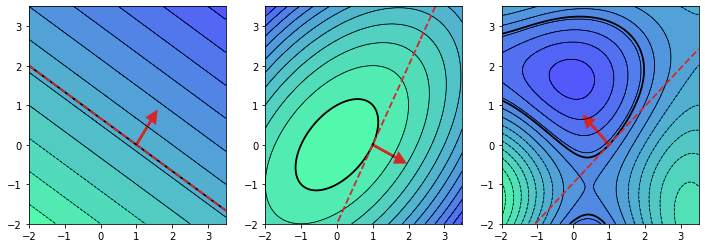

In [4]:
# Plot three functions
plt.figure(figsize=(12, 4))

plt.subplot(131)
plot_contour(X, Y, f1_s)
plot_level_gradient(X, Y, f1_s, cord=(1, 0))

plt.subplot(132)
plot_contour(X, Y, f2_s)
plot_level_gradient(X, Y, f2_s, cord=(1, 0))

plt.subplot(133)
plot_contour(X, Y, f3_s)
plot_level_gradient(X, Y, f3_s, cord=(1, 0))

Contour plots of $f_1$, $f_2$ and $f3$ shows above. 
Next, quradratic approximation of the function should computed with following function: 

$f(\alpha)\approx f(\alpha_0) + \triangledown f(\alpha_0)^{T}(\alpha - \alpha_0) + \frac{1}{2}(\alpha - \alpha_0)^{T}\triangledown^{2}f(\alpha_0)(\alpha - \alpha_0)$

The implementation of the above approximation as follow:

In [5]:
# ===========================================================
# Function to compute quadratic approximation of f(x)
# return the quadratic symbol function
# ===========================================================
def quad_approx(f_s, cord=(1, 0)):
    
    x0 = cord[0]
    y0 = cord[1]
    # Compute derivative and hessian
    df_s = Matrix([sp.diff(f_s, x_s), sp.diff(f_s, y_s)])
    hf_s = hessian(f_s, (x_s, y_s))
    # Compute cordinates transformation
    a_a0 = Matrix([x_s, y_s]) - Matrix([x0, y0])
    
    df = sp.lambdify((x_s, y_s), df_s)
    hf = sp.lambdify((x_s, y_s), hf_s)
    f = sp.lambdify((x_s, y_s), f_s)
    
    f_approx = f(x0, y0) + (df(x0, y0).T * a_a0)[0] + 0.5 * (a_a0.T * hf(x0, y0) * a_a0)[0]

    return f_approx

Plot the three-dimensional approximation as follow (since the 3-d plotting functions are already established at last assignment, I just simply hide the code in background of jupyter notebook and just show implementations and results).

In [6]:
# ===========================================================
# Function to plot f's 3-D manifestation
# ===========================================================
def plot_3d(X, Y, f_s, ax):
    
    # convert symbol to numeric
    f = sp.lambdify((x_s, y_s), f_s, 'numpy')
    
    ax.plot_surface(X, Y, f(X, Y), rstride=5, cstride=5, cmap=plt.cm.winter_r)
    ax.contour(X, Y, f(X, Y), zdir='z', offset=-10, cmap=plt.cm.winter_r)
    ax.set_zlim(-10, 20)
    return

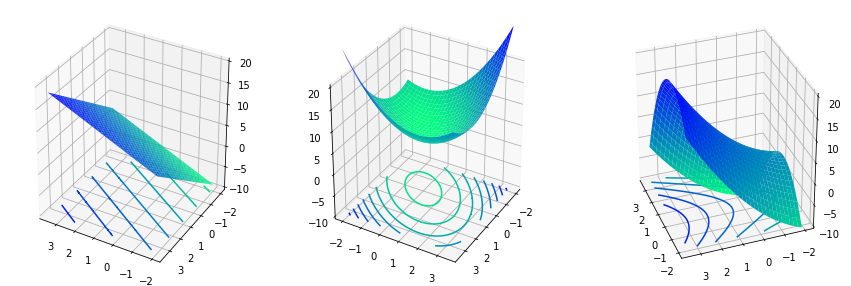

In [7]:
# Plot
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 3, 1, projection='3d')
plot_3d(X, Y, quad_approx(f1_s, cord=(1, 0)), ax)
ax.view_init(30, 120)

ax = fig.add_subplot(1, 3, 2, projection='3d')
plot_3d(X, Y, quad_approx(f2_s, cord=(1, 0)), ax)
ax.view_init(30, 30)

ax = fig.add_subplot(1, 3, 3, projection='3d')
plot_3d(X, Y, quad_approx(f3_s, cord=(1, 0)), ax)
ax.view_init(30, 160)

The above is the 3-d plot of quadratic approximation in point $(x, y) = (1, 0)$.

## (c)

In [8]:
def plot_all_22c(cord=(1, 0)):
    # Plot for (.7, 2)
    plt.figure(figsize=(12, 4))

    plt.subplot(131)
    plot_contour(X, Y, f1_s)
    plot_level_gradient(X, Y, f1_s, cord=cord)

    plt.subplot(132)
    plot_contour(X, Y, f2_s)
    plot_level_gradient(X, Y, f2_s, cord=cord)

    plt.subplot(133)
    plot_contour(X, Y, f3_s)
    plot_level_gradient(X, Y, f3_s, cord=cord)

    # 3-d plot
    fig = plt.figure(figsize=(15, 5))

    ax = fig.add_subplot(1, 3, 1, projection='3d')
    plot_3d(X, Y, quad_approx(f1_s, cord=cord), ax)
    ax.view_init(30, 120)

    ax = fig.add_subplot(1, 3, 2, projection='3d')
    plot_3d(X, Y, quad_approx(f2_s, cord=cord), ax)
    ax.view_init(30, 30)

    ax = fig.add_subplot(1, 3, 3, projection='3d')
    plot_3d(X, Y, quad_approx(f3_s, cord=cord), ax)
    ax.view_init(30, 160)
    return


Repeat previous plot for point $(x, y) = (-0.7, 2)$. Here I only show the implementation with a function instead of expatiatory codes, since there are just different with only cordinates.

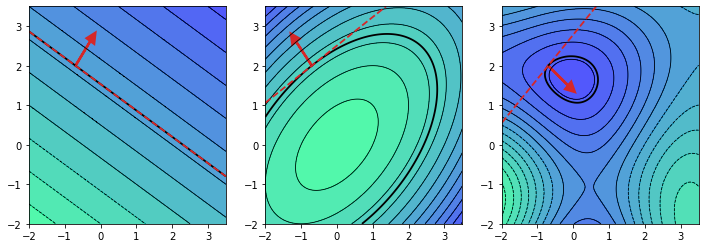

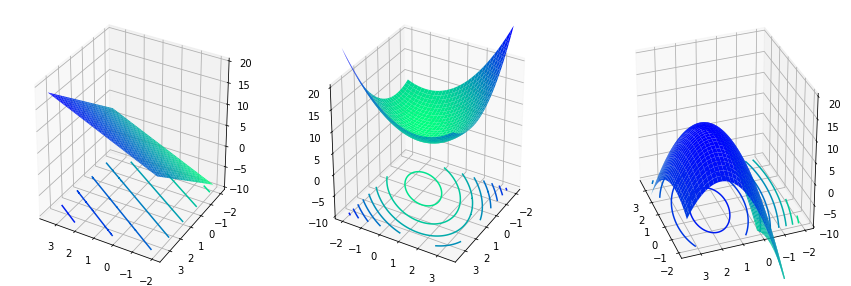

In [9]:
plot_all_22c(cord=(-.7, 2))

The above is 3-d quadratic approximation plot for point $(x, y) = (-0.7, 2)$.

Now, repeat previous plot for point $(x, y) = (2.5, -1)$.

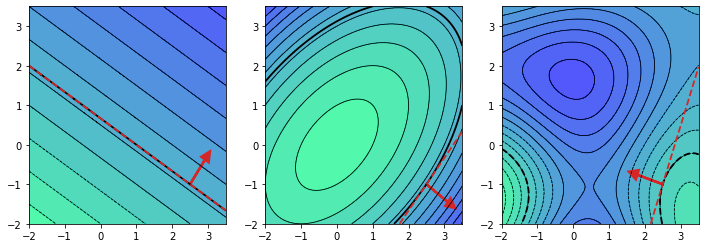

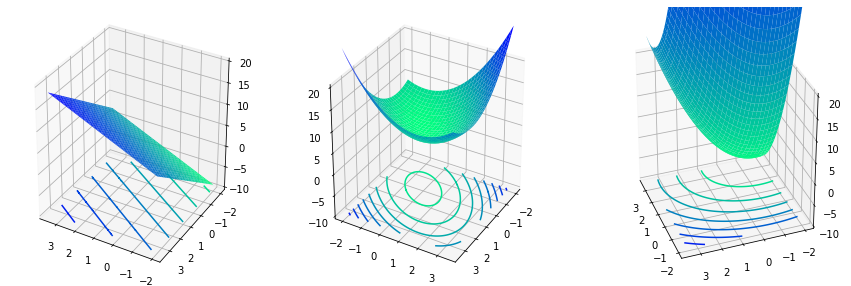

In [10]:
plot_all_22c(cord=(2.5, -1))

## (d)

From the Above, we can know, since the functions $f_1$ is just linear polynomial and $f_2$ is quadratic polynomial. Both of them can explained well with quadratic approximation, *i.e.* the component of higher approximation is $0$, which lead to an accurate approximation.

However, the non-polynomial function $f_3$ still has component of higher approximation, *i.e.* the equivalent infinitesimal still has great impact to the approximation accuracy, this means we only got the precise approximation near the point we choosed. 